In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv('nlp_start/train.csv')
test_df=pd.read_csv('nlp_start/test.csv')

In [3]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [8]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [9]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=3657, text='.@KurtSchlichter Yep considering that *millions* of Japanese fatalities were projected for Downfall. @_FreeMarketeer @dibang', target=1)
Pandas(Index=1494, text='Human history becomes more and more a race between education and catastrophe.', target=0)
Pandas(Index=1275, text='I spent 17 minutes walking with RunKeeper. 90 calories burned. #LoseIt', target=0)
Pandas(Index=3771, text='When your heart is bigger than the obstacles  in front of you #euro #dontexpectnothing #july #fire @euro', target=0)


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [11]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [12]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [13]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [15]:
text_vectorizer.adapt(train_sentences)

In [16]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [17]:
words = text_vectorizer.get_vocabulary()



In [18]:
from tensorflow.keras.layers import Embedding

In [19]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [20]:
embedding

In [21]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.03613827, -0.01618369, -0.03479994, ...,  0.04567775,
         0.03067318, -0.02683821],
       [-0.02660451, -0.02514904, -0.03756065, ...,  0.00311034,
        -0.03542763,  0.00444805],
       [ 0.03105544, -0.02838855,  0.01726771, ...,  0.04103993,
        -0.02632862,  0.0364282 ],
       ...,
       [-0.0321027 ,  0.04522001, -0.00532261, ...,  0.01040272,
        -0.00820903,  0.03063505],
       [-0.0321027 ,  0.04522001, -0.00532261, ...,  0.01040272,
        -0.00820903,  0.03063505],
       [-0.0321027 ,  0.04522001, -0.00532261, ...,  0.01040272,
        -0.00820903,  0.03063505]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\38068\.conda\envs\tutorialspoint\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [24]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [25]:
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [27]:
y_hat0=model_0.predict(test_sentences)

In [28]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64))

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [30]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

In [31]:
test_sentences.dtype

dtype('O')

In [32]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [33]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 5s 23ms/step - loss: 0.6097 - accuracy: 0.7006 - val_loss: 0.5204 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4416 - accuracy: 0.8174 - val_loss: 0.4412 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3484 - accuracy: 0.8606 - val_loss: 0.4281 - val_accuracy: 0.8045
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2861 - accuracy: 0.8897 - val_loss: 0.4295 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.2385 - accuracy: 0.9115 - val_loss: 0.4442 - val_accuracy: 0.8018


In [36]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8018


[0.4441665709018707, 0.8018372654914856]

In [37]:
res_model_1=pd.DataFrame(model_1_history.history)

<AxesSubplot:>

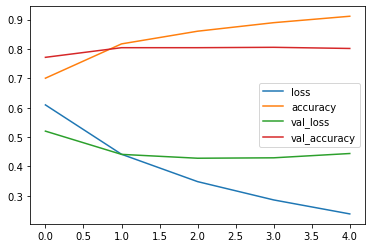

In [38]:
res_model_1.plot()

In [39]:
test_labels.shape

(762,)

In [40]:
y_hat1=model_1.predict(test_sentences)

In [41]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [42]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [43]:
calculate_results(test_labels,y_hat1)

{'accuracy': 80.18372703412074,
 'precision': 0.8011327359208663,
 'recall': 0.8018372703412073,
 'f1': 0.7997141610516048}

In [44]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 4 start

In [45]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [46]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [47]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_2_history = model_2.fit(
                                train_sentences,train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels)
)

Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.2203 - accuracy: 0.9190 - val_loss: 0.5281 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1560 - accuracy: 0.9454 - val_loss: 0.5953 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1267 - accuracy: 0.9549 - val_loss: 0.5889 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1115 - accuracy: 0.9609 - val_loss: 0.7457 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0846 - accuracy: 0.9688 - val_loss: 0.9515 - val_accuracy: 0.7664


In [49]:
model_2.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.9515 - accuracy: 0.7664


[0.9514555335044861, 0.7664042115211487]

In [50]:
y_hat2=model_2.predict(test_sentences)

y_hat2[:10]

array([[9.9961734e-01],
       [8.9911139e-01],
       [4.3055415e-04],
       [9.6003473e-02],
       [9.4910187e-01],
       [1.6851693e-01],
       [7.7456832e-03],
       [3.6940277e-01],
       [2.4280870e-01],
       [9.9985063e-01]], dtype=float32)

In [51]:
y_hat2=tf.squeeze(tf.round(y_hat2))

y_hat2

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [52]:
calculate_results(test_labels,y_hat2),calculate_results(test_labels,y_hat1),calculate_results(test_labels,y_hat0)

({'accuracy': 76.64041994750657,
  'precision': 0.7648348277363027,
  'recall': 0.7664041994750657,
  'f1': 0.7649630898965559},
 {'accuracy': 80.18372703412074,
  'precision': 0.8011327359208663,
  'recall': 0.8018372703412073,
  'f1': 0.7997141610516048},
 {'accuracy': 80.97112860892388,
  'precision': 0.8184785838596061,
  'recall': 0.8097112860892388,
  'f1': 0.8032877870568117})

In [53]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [54]:
model_3.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [55]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_3.fit(train_sentences,train_labels, 
            epochs=5, 
            validation_data=(test_sentences,test_labels)           

)

Epoch 1/5
215/215 [==============================] - 8s 27ms/step - loss: 0.1599 - accuracy: 0.9350 - val_loss: 0.6932 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0858 - accuracy: 0.9677 - val_loss: 0.7800 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0696 - accuracy: 0.9739 - val_loss: 0.8398 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0602 - accuracy: 0.9742 - val_loss: 1.0918 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0515 - accuracy: 0.9769 - val_loss: 1.2028 - val_accuracy: 0.7493


In [57]:
model_3.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.2028 - accuracy: 0.7493


[1.2028472423553467, 0.7493438124656677]

In [58]:
y_hat3 = model_3.predict(test_sentences)

y_hat3[:10]

array([[9.9982166e-01],
       [9.9850905e-01],
       [8.1241444e-05],
       [1.8774986e-02],
       [9.9618065e-01],
       [8.1014240e-01],
       [2.7368665e-03],
       [4.0928712e-01],
       [9.3006563e-01],
       [9.9990100e-01]], dtype=float32)

In [59]:
y_hat3=tf.squeeze(tf.round(y_hat3))

y_hat3

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [60]:
calculate_results(test_labels,y_hat3)

{'accuracy': 74.93438320209974,
 'precision': 0.7487884820672733,
 'recall': 0.7493438320209974,
 'f1': 0.749033483012057}

In [61]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(16))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional_LSTM")

(None, 15, 128)
(None, 32)


In [62]:
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [63]:
model_4.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                18560     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,298,593
Trainable params: 1,298,593
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_4.fit(train_sentences,train_labels,epochs=5, 
validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.1730 - accuracy: 0.9594 - val_loss: 0.7900 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0645 - accuracy: 0.9771 - val_loss: 0.9111 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0502 - accuracy: 0.9784 - val_loss: 1.0982 - val_accuracy: 0.7428
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0435 - accuracy: 0.9803 - val_loss: 1.1288 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.0413 - accuracy: 0.9809 - val_loss: 1.1468 - val_accuracy: 0.7533


In [65]:
model_4.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.1468 - accuracy: 0.7533


[1.1468409299850464, 0.7532808184623718]

In [66]:
y_hat4 = model_4.predict(test_sentences)

In [67]:
y_hat4=tf.squeeze(tf.round(y_hat4))

y_hat4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [68]:
calculate_results(test_labels,y_hat4)

{'accuracy': 75.32808398950131,
 'precision': 0.7517186638498862,
 'recall': 0.7532808398950132,
 'f1': 0.7520701220594367}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 5 start

In [69]:
tf.random.set_seed(49)

from tensorflow.keras import layers

In [70]:
model_5embedding = layers.Embedding(input_dim=10000, 
                                    output_dim=128, 
                                    embeddings_initializer="uniform", 
                                    input_length=15, 
                                    name="embedding_5")

In [71]:
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x= model_5embedding(x)
x= layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")


In [72]:
model_5.compile(
            loss="binary_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=["accuracy"]
)

In [73]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

In [74]:
model_5_history= model_5.fit(
    train_sentences,train_labels, epochs=5, validation_data=(test_sentences, test_labels)
)

Epoch 1/5
215/215 [==============================] - 7s 28ms/step - loss: 0.5629 - accuracy: 0.7190 - val_loss: 0.4354 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3407 - accuracy: 0.8578 - val_loss: 0.4342 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2103 - accuracy: 0.9223 - val_loss: 0.4987 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1339 - accuracy: 0.9581 - val_loss: 0.5580 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0941 - accuracy: 0.9701 - val_loss: 0.5974 - val_accuracy: 0.7887


In [75]:
y_hat5=model_5.predict(test_sentences)

y_hat5[:10]

array([[0.9873441 ],
       [0.30326307],
       [0.29388368],
       [0.82518697],
       [0.81672925],
       [0.01382145],
       [0.05414483],
       [0.10373542],
       [0.7643857 ],
       [0.99999744]], dtype=float32)

In [76]:
y_hat5=tf.squeeze(tf.round(y_hat5))

y_hat5[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 1.], dtype=float32)>

In [77]:
calculate_results(y_true=test_labels, y_pred=y_hat5)

{'accuracy': 78.87139107611549,
 'precision': 0.7874771155108337,
 'recall': 0.7887139107611548,
 'f1': 0.7874783506734244}

In [83]:
url="https://tfhub.dev/google/universal-sentence-encoder/4"

sentence_encoder_layer = hub.KerasLayer(url,input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [84]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [85]:
model_6.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)


In [87]:
model_6_history=model_6.fit(train_sentences,train_labels,epochs=5,
                        validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4194 - accuracy: 0.8137 - val_loss: 0.4026 - val_accuracy: 0.8097
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4047 - accuracy: 0.8216 - val_loss: 0.3997 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3954 - accuracy: 0.8263 - val_loss: 0.3966 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3882 - accuracy: 0.8269 - val_loss: 0.3985 - val_accuracy: 0.8228
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3801 - accuracy: 0.8348 - val_loss: 0.3978 - val_accuracy: 0.8176


In [88]:
y_hat6=model_6.predict(test_sentences)

y_hat6[:10]

array([[0.9007226 ],
       [0.17475972],
       [0.11535549],
       [0.37472594],
       [0.07085836],
       [0.09827903],
       [0.3245031 ],
       [0.10231876],
       [0.5235798 ],
       [0.976301  ]], dtype=float32)

In [89]:
y_hat6=tf.squeeze(tf.round(y_hat6))

y_hat6[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [90]:
calculate_results(test_labels,y_hat6)

{'accuracy': 81.75853018372703,
 'precision': 0.8167367724544085,
 'recall': 0.8175853018372703,
 'f1': 0.8165185760472422}